# 2 Quantum circuit of the phase flip code  [Wikipedia](https://en.wikipedia.org/wiki/Quantum_error_correction)

In [1]:
!pip install qiskit qiskit-aer pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 3.4 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=0518b7f8e36426a28c581dfa267418f5623236141ac0d52614d1666d91da99e7
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


In [2]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

backend = AerSimulator()

# Design the quantum circuit
By default, $q_{0}=q_{1}=q_{2}=\lvert 0 \rangle$, we use Hadamard gate to change $q_{0}$ from $\lvert 0 \rangle$ to $\lvert + \rangle$.

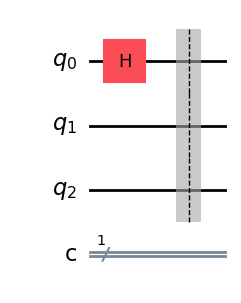

In [3]:
qc = QuantumCircuit(3, 1)
qc.h(0)
qc.barrier()
qc.draw('mpl')

Use CNOT gates to entangle $q_{0}$ with $q_{1}$ and $q_{2}$.

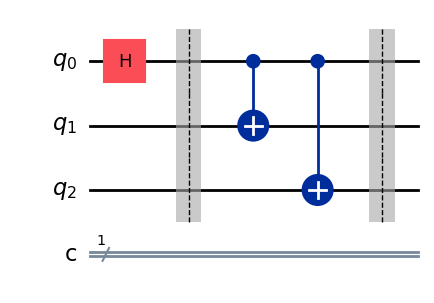

In [4]:
qc.cx(0, 1)
qc.cx(0, 2)
qc.barrier()
qc.draw('mpl')

Apply Hadamard to each qubit, make phase flip equivalent to bit flip.

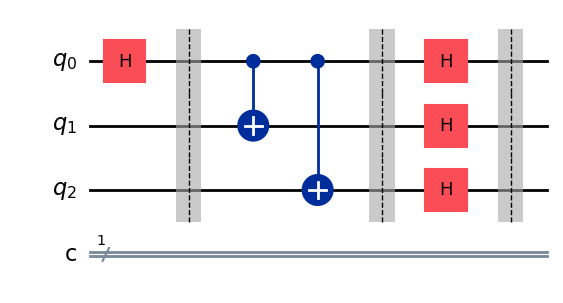

In [5]:
qc.h([0, 1, 2])
qc.barrier()
qc.draw('mpl')

Introduce a bit flip error, which could happen on any qubit, let's take $q_{0}$ for example.

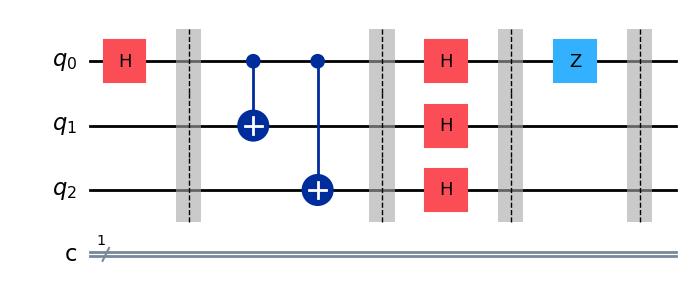

In [6]:
qc.z(0)
qc.barrier()
qc.draw('mpl')

Reverse the Hadamard effect.

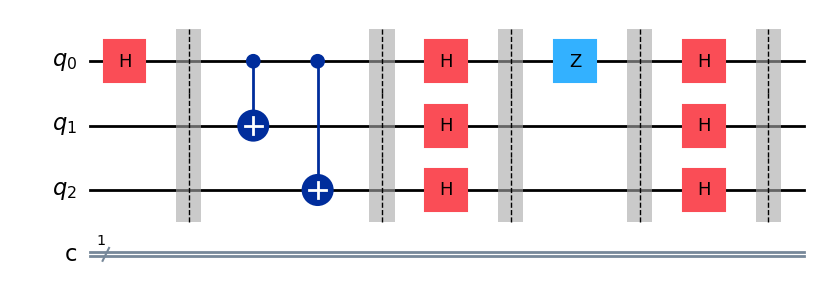

In [7]:
qc.h([0, 1, 2])
qc.barrier()
qc.draw('mpl')

The error correction block contains two CNOT and one CCNOT, implementing a majority-vote.

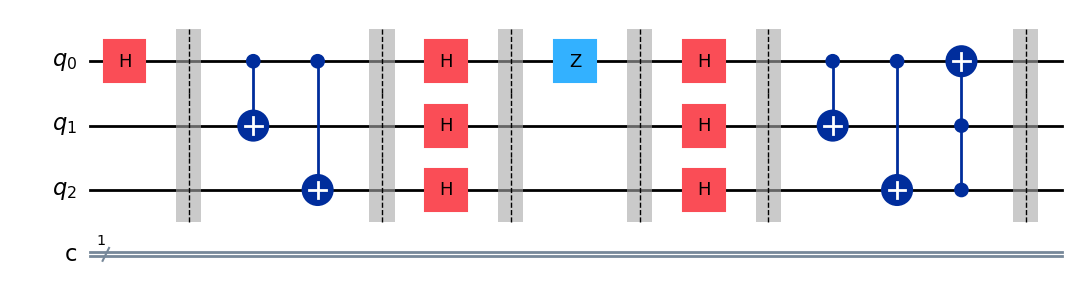

In [8]:
qc.cx(0, 1)
qc.cx(0, 2)
qc.ccx(1, 2, 0)
qc.barrier()
qc.draw('mpl')

Measure the qubit $q_{0}$ and write into the classical bit $c$.

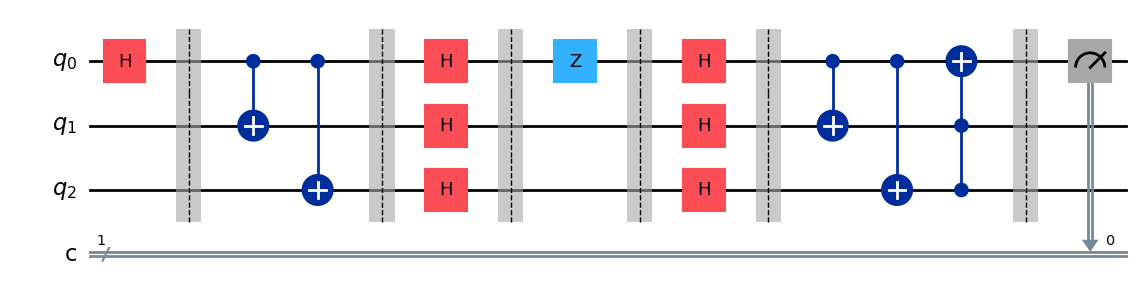

In [9]:
qc.measure(0, 0)
qc.draw('mpl')

# Simulate the quantum circuit
The result shows the distribution of 10000 total counts, which meets expectation.

In [10]:
job    = backend.run(qc, shots=10000)
result = job.result()
counts = result.get_counts()
print('Result:', counts)

Result: {'0': 4999, '1': 5001}
